# Импорт

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec


# Загрузка Датасета

In [7]:
data = pd.read_csv(
    '../../DATA/Split/Число ночевок в гостиницах и ананлогичных средствах размещения.csv').drop('Unnamed: 0', axis=1)


In [8]:
data.columns.to_numpy().shape

(15,)

# Графики "Коробка с усами"

In [9]:
data = data.apply(lambda s: s.map(lambda a: float(a.replace(',', '.')) if type(a) is str else a))
names = data.columns.to_numpy()[1:]


## Без нормирования

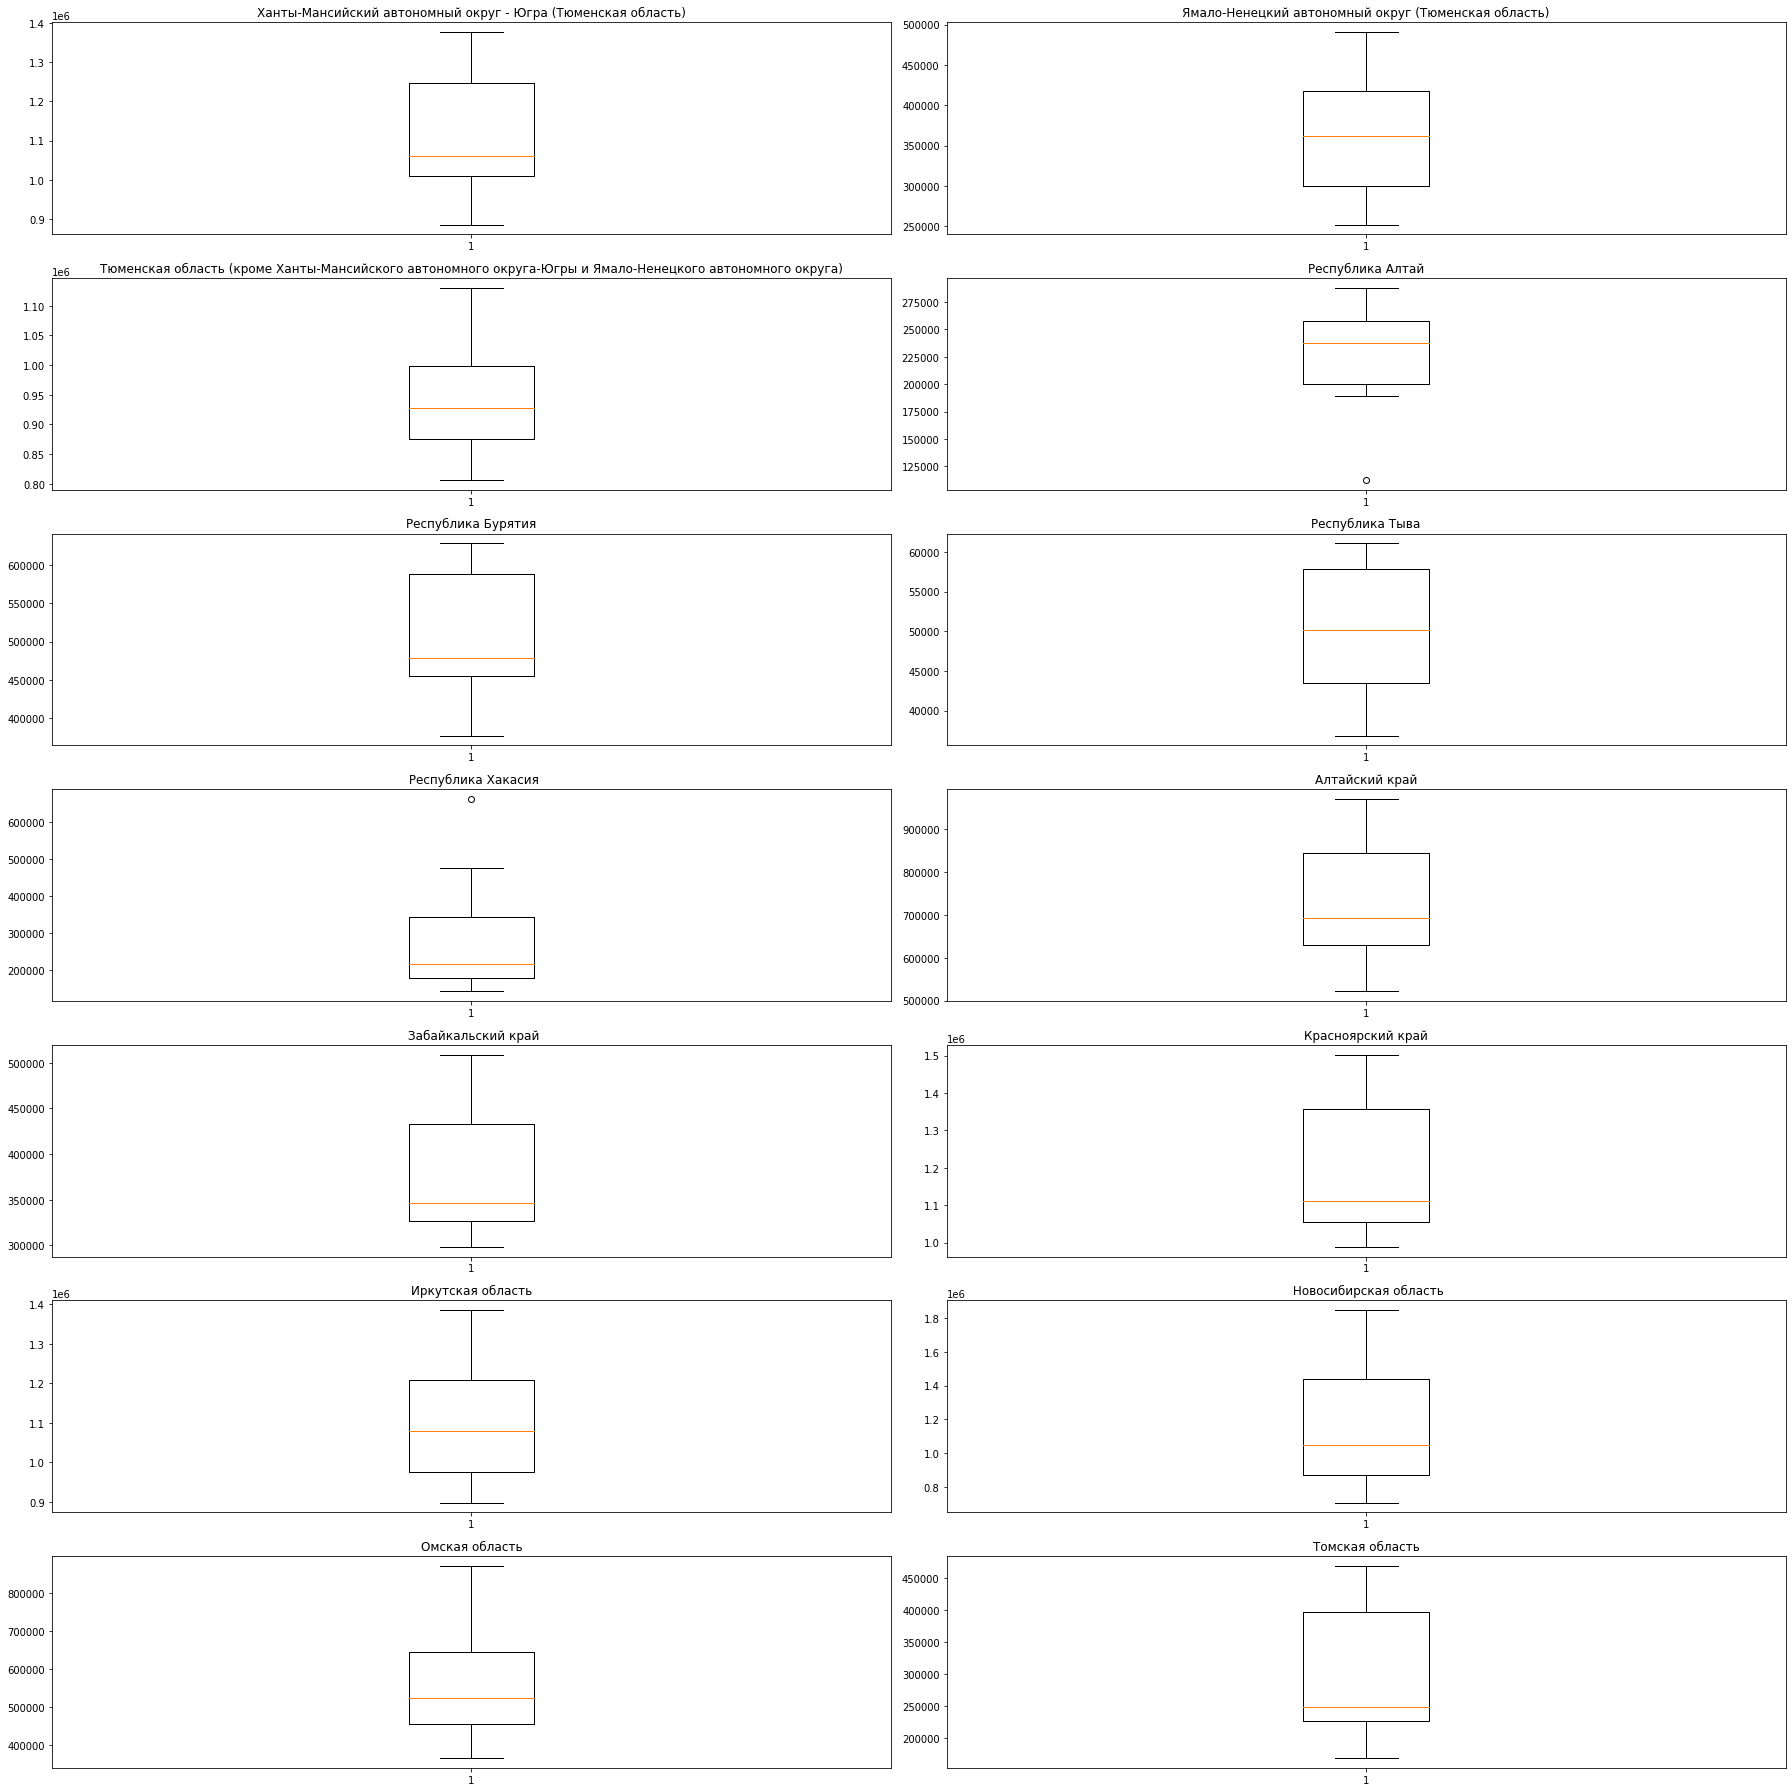

In [10]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(25)
fig.set_figwidth(25)
gs = gridspec.GridSpec(7, 2)
n = 0
for i in range(7):
    for j in range(2):
        ax = fig.add_subplot(gs[i, j])
        ax.boxplot(data[names[n]].dropna())
        ax.set_title(names[n])
        n += 1

## С MinMax нормированием

In [11]:
a = -1
b = 1
data_normed_by_min_max = data.apply(lambda s: a + (s - s.min())/(s.max() - s.min()) * (b-a))


,year,Ханты-Мансийский автономный округ - Югра (Тюменская область),Ямало-Ненецкий автономный округ (Тюменская область),Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа),Республика Алтай,Республика Бурятия,Республика Тыва,Республика Хакасия,Алтайский край,Забайкальский край,Красноярский край,Иркутская область,Новосибирская область,Омская область,Томская область
0,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.764706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.647059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.529412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.411765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.294118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.176471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.058824,-0.674504,-0.609980,NaN,-1.000000,-1.000000,-0.325467,-1.000000,-1.000000,1.000000,-0.741862,-0.729739,-1.000000,-0.984876,-0.459087
8,0.058824,-1.000000,0.391072,NaN,0.711992,-0.146496,1.000000,-0.839634,-0.861166,0.493642,-0.741917,-0.310851,-0.992043,-0.575151,-0.485398
9,0.176471,0.608352,1.000000,-1.000000,0.428254,1.000000,0.330088,-0.910519,-0.339335,-0.778293,-0.436714,-0.539982,-0.745654,0.102366,-0.489751


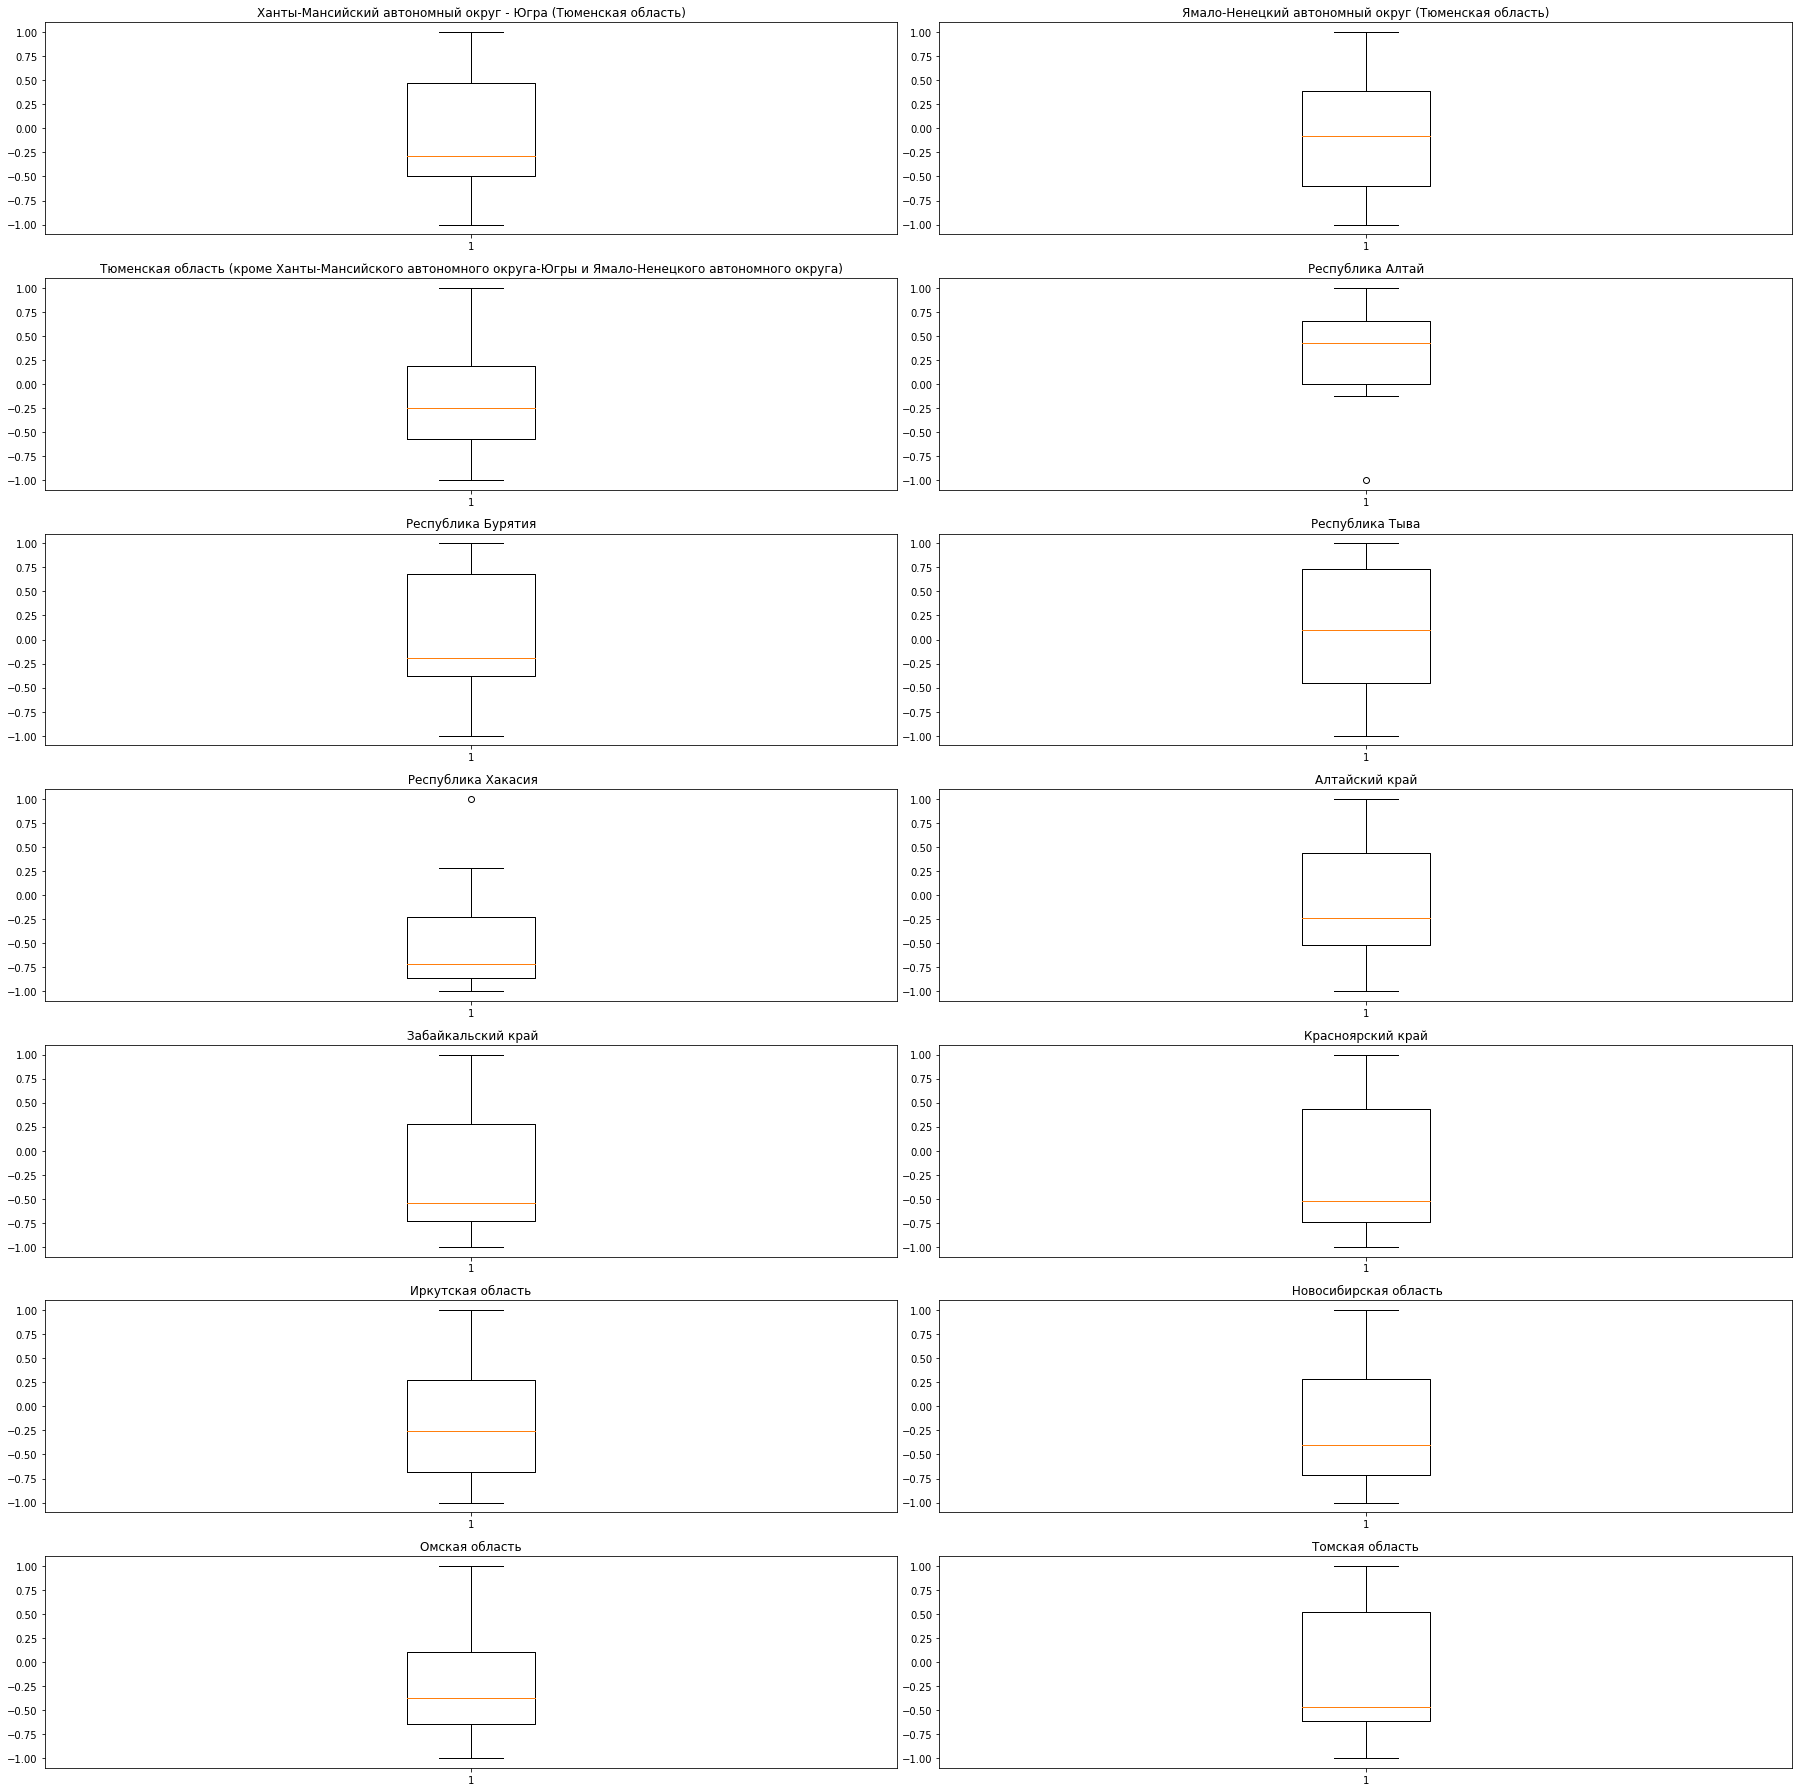

In [12]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(25)
fig.set_figwidth(25)
gs = gridspec.GridSpec(7, 2)
n = 0
for i in range(7):
    for j in range(2):
        ax = fig.add_subplot(gs[i, j])
        ax.boxplot(data_normed_by_min_max[names[n]].dropna())
        ax.set_title(names[n])
        n += 1


## Со средне-дисперсной нормированием

In [13]:
a = -1
b = 1
data_normed_by_mean_dispersion = data.apply(lambda s: (s-s.mean())/s.std())


,year,Ханты-Мансийский автономный округ - Югра (Тюменская область),Ямало-Ненецкий автономный округ (Тюменская область),Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа),Республика Алтай,Республика Бурятия,Республика Тыва,Республика Хакасия,Алтайский край,Забайкальский край,Красноярский край,Иркутская область,Новосибирская область,Омская область,Томская область
0,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.764706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.647059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.529412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.411765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.294118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.176471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.058824,-0.674504,-0.609980,NaN,-1.000000,-1.000000,-0.325467,-1.000000,-1.000000,1.000000,-0.741862,-0.729739,-1.000000,-0.984876,-0.459087
8,0.058824,-1.000000,0.391072,NaN,0.711992,-0.146496,1.000000,-0.839634,-0.861166,0.493642,-0.741917,-0.310851,-0.992043,-0.575151,-0.485398
9,0.176471,0.608352,1.000000,-1.000000,0.428254,1.000000,0.330088,-0.910519,-0.339335,-0.778293,-0.436714,-0.539982,-0.745654,0.102366,-0.489751


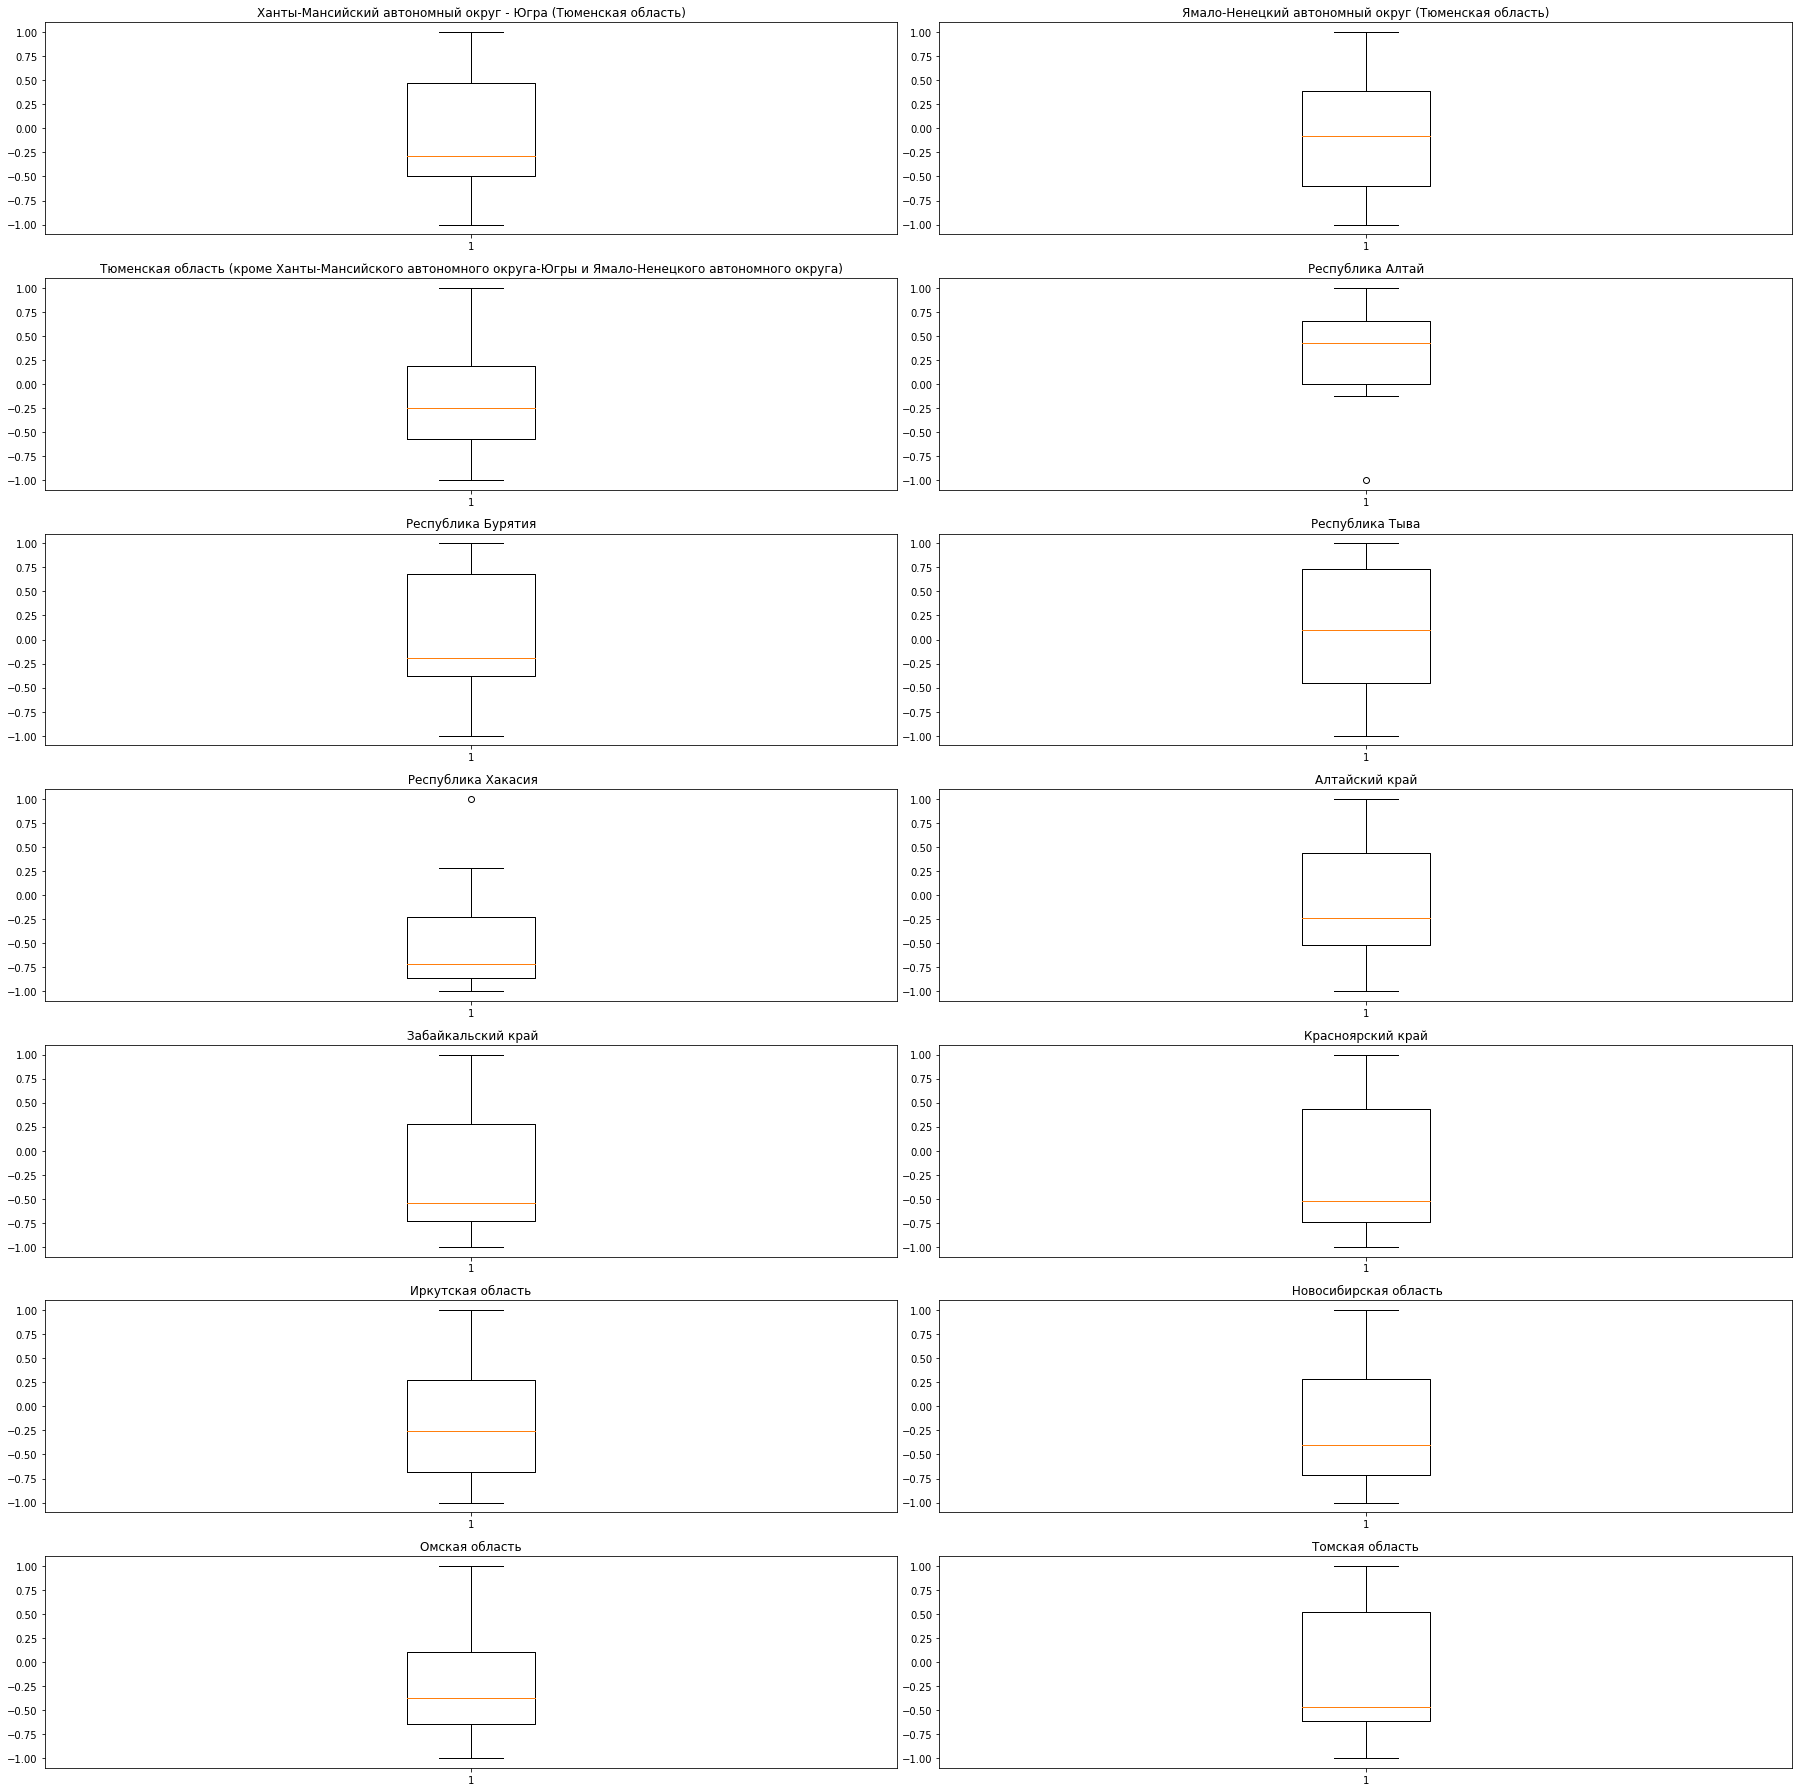

In [14]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(25)
fig.set_figwidth(25)
gs = gridspec.GridSpec(7, 2)
n = 0
for i in range(7):
    for j in range(2):
        ax = fig.add_subplot(gs[i, j])
        ax.boxplot(data_normed_by_mean_dispersion[names[n]].dropna())
        ax.set_title(names[n])
        n += 1


# Кореляция между городами

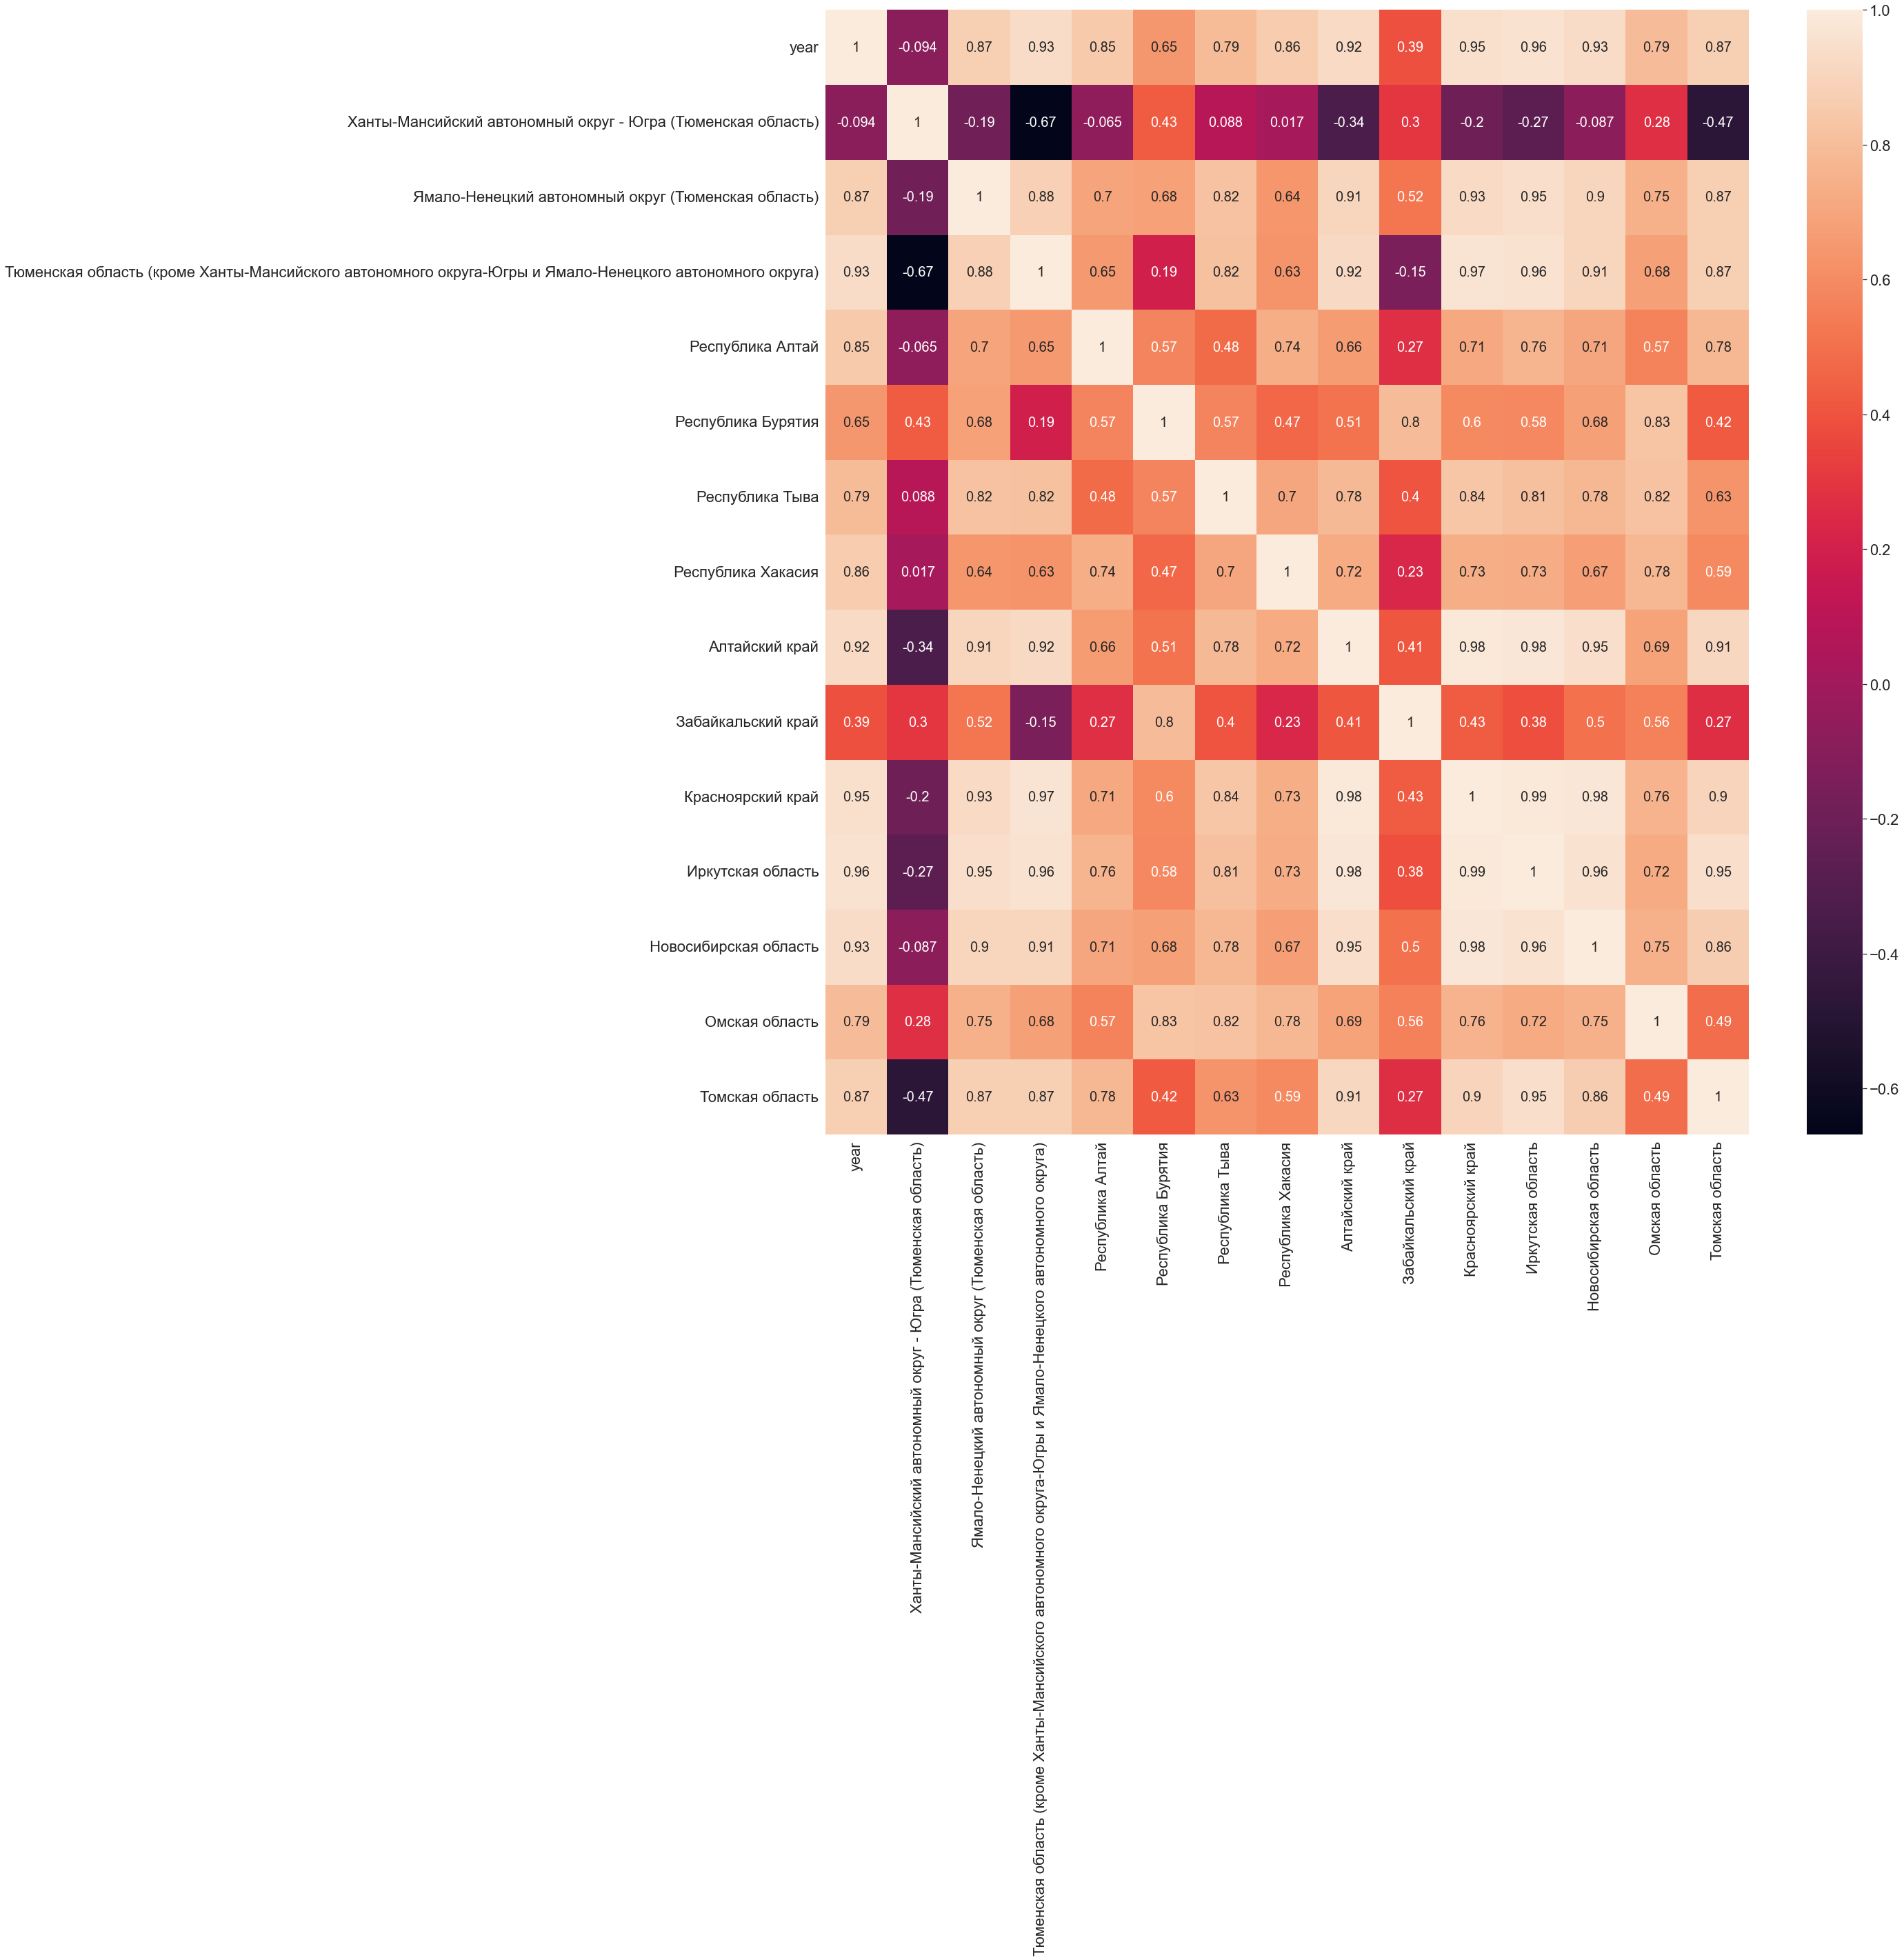

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(method='pearson'), annot=True, annot_kws={"fontsize":20}).get_figure()
sns.set(font_scale=3)
